 
<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home"><center>Get Started in Deep Learning</center></h3>

* [The 5-Step Model Life-Cycle](#1)
* [Import](#2)
* [Prepare Data/Impute Missing Value](#3)
* [Sequential Model API](#4)   
* [Modeling](#100)
* [Submission](#100)
    
Predictive modeling with deep learning is a skill that modern developers need to know.

TensorFlow is the premier open-source deep learning framework developed and maintained by Google. Although using TensorFlow directly can be challenging, the modern tf.keras API beings the simplicity and ease of use of Keras to the TensorFlow project.

Using tf.keras allows you to design, fit, evaluate, and use deep learning models to make predictions in just a few lines of code. It makes common deep learning tasks, such as classification and regression predictive modeling, accessible to average developers looking to get things done.

In this Notebook, you will discover a step-by-step guide to developing deep learning models in TensorFlow using the tf.keras API.
 Deep Learning Model Life-Cycle

In this section, you will discover the life-cycle for a deep learning model and the two tf.keras APIs that you can use to define models.
    
<a id="top"></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home"><center>The 5-Step Model Life-Cycle</center></h3>

A model has a life-cycle, and this very simple knowledge provides the backbone for both modeling a dataset and understanding the tf.keras API.

The five steps in the life-cycle are as follows:
    

                Define the model.

                Compile the model.

                Fit the model.

                Evaluate the model.

                Make predictions.    

   
https://www.kaggle.com/bannourchaker/deep-learning-starter-gpu
    
https://www.kaggle.com/bannourchaker/10-deeplearning-embedding-rnn-tf-keras/edit/run/74137751    
    
<a id="top"></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home"><center>Import</center></h3>

In [1]:
###############################################################################
#                       Load Library                                          #
###############################################################################

#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
# Preparation  
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
# Import StandardScaler from scikit-learn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline,FeatureUnion
from sklearn.manifold import TSNE
# Import train_test_split()
# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score,recall_score
from sklearn.metrics import make_scorer,mean_absolute_error
from sklearn.metrics import mean_squared_error,classification_report,f1_score
from sklearn.metrics import roc_curve,confusion_matrix
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.linear_model import LogisticRegression

import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.metrics import AUC
#import smogn
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone,ClassifierMixin
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif,chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
import lightgbm as lgbm
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier,XGBRegressor
from sklearn import set_config
from itertools import combinations
# Cluster :
from sklearn.cluster import MiniBatchKMeans
#from yellowbrick.cluster import KElbowVisualizer
#import smong 
import category_encoders as ce
import warnings
#import optuna 
from joblib import Parallel, delayed
import joblib 
from sklearn import set_config
from typing import List, Optional, Union
import itertools
import shap

# Imbalanced data 
from imblearn.datasets import fetch_datasets
# to correctly set up the cross-validation
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import (
    RandomUnderSampler,
    CondensedNearestNeighbour,
    TomekLinks,
    OneSidedSelection,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    AllKNN,
    NeighbourhoodCleaningRule,
    NearMiss,
    InstanceHardnessThreshold
)
from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTE,
    ADASYN,
    BorderlineSMOTE,
    SVMSMOTE,
)
import gc
set_config(display='diagram')
warnings.filterwarnings('ignore')


2022-01-10 16:34:05.690693: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


<a id="top"></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home"><center>Load Data</center></h3>
## Load the training data

In [2]:
%%time 
###############################################################################
#                        Read train data                                      #
###############################################################################

train = pd.read_csv('../input/GiveMeSomeCredit/cs-training.csv')
test = pd.read_csv('../input/GiveMeSomeCredit/cs-test.csv')
train.head(3)

CPU times: user 206 ms, sys: 58.7 ms, total: 265 ms
Wall time: 395 ms


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


In [3]:
###############################################################################
#                       Cast dtypes                                           #
###############################################################################

# Convert Dtypes :
train[train.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns] = train[train.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object','category']).columns] = train.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))
# Convert Dtypes :
test[test.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns] = test[test.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns].apply(pd.to_numeric)
test[test.select_dtypes(['object','category']).columns] = test.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))

In [4]:
###############################################################################
#                        Reduce Memory                                        #
###############################################################################

# Author : https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        name =df[col].dtype.name 
        
        if col_type != object and col_type.name != 'category':
        #if name != "category":    
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
train= reduce_mem_usage(train)
test= reduce_mem_usage(test)

Memory usage of dataframe is 13.73 MB
Memory usage after optimization is: 3.29 MB
Decreased by 76.0%
Memory usage of dataframe is 9.29 MB
Memory usage after optimization is: 2.90 MB
Decreased by 68.7%


In [5]:
y = train['SeriousDlqin2yrs']

<a id="top"></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home"><center>Prepare Data/Impute Missing Value</center></h3>


## Prepare Data :

In [6]:
%%time 
###############################################################################
#                        Impute Data                                          #
###############################################################################
param =  {   "verbosity": 0,
            #"objective": "binary:logistic",
            #"eval_metric": "auc",
            'random_state': 42,
            # regression
            'objective':'reg:squarederror', 
             'eval_metric': 'mae',
            #early_stopping_rounds=100 ,
            'gpu_id':0, 
            'predictor':"gpu_predictor",
            # use exact for small dataset.
            #"tree_method": "exact",
            # big data :
            'tree_method': 'gpu_hist',
            # defines booster, gblinear for linear functions.
             'booster': 'gbtree', 
            'lambda': 8.544792472633987e-07,
            'alpha': 0.31141671752487043,
            'subsample': 0.8779467596981366, 
            'colsample_bytree': 0.9759532762677546,
            'learning_rate': 0.008686087328805853, 
            'n_estimators': 6988,
            'max_depth': 9,
            'min_child_weight': 2, 
            'eta': 3.7603213457541647e-06,
            'gamma': 2.1478058456847449e-07,
            'grow_policy': 'lossguide'}
                

#model_xgb = XGBRegressor(
       #objective="mae",
 #   **xgb_params2)

numeric_transformer1 = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                           # ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
numeric_transformer2 = Pipeline(
                            steps=[
                            #('imputer', SimpleImputer(strategy='median'
                             #                         ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                           # ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )

pipe_xgbr1 = Pipeline(
                    steps=[
                        ('preprocessor', numeric_transformer1),
                        ('classifier', XGBRegressor(
                      #objective="mae",
                       **param))
                    ]
                )
pipe_xgbr2 = Pipeline(
                    steps=[
                        ('preprocessor', numeric_transformer2),
                        ('classifier', XGBRegressor(
                      #objective="mae",
                       **param))
                    ]
                )
train=train.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
test=test.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
train_final= pd.concat( [train, test], axis=0) 
#testdf_income= train_final[train_final['MonthlyIncome'].isnull()==True]
traindf_income = train_final[train_final['MonthlyIncome'].isnull()==False]
y_income = traindf_income['MonthlyIncome']
X_income=traindf_income.drop(["MonthlyIncome"],axis=1)
pipe_xgbr1.fit(X_income, y_income)
train_income_missing=train[train['MonthlyIncome'].isnull()==True].drop(["MonthlyIncome"],axis=1)
test_income_missing=test[test['MonthlyIncome'].isnull()==True].drop(["MonthlyIncome"],axis=1)
train_predicted = pipe_xgbr1.predict(train_income_missing)
test_predicted = pipe_xgbr1.predict(test_income_missing)
train.loc[(train.MonthlyIncome.isnull()), 'MonthlyIncome'] = train_predicted
test.loc[(test.MonthlyIncome.isnull()), 'MonthlyIncome'] = test_predicted

CPU times: user 2min 43s, sys: 2.88 s, total: 2min 46s
Wall time: 2min 46s


In [7]:
%%time 
traindf_NumberOfDependents = train_final[train_final['NumberOfDependents'].isnull()==False]
y_NumberOfDependents = traindf_NumberOfDependents['NumberOfDependents']
X_NumberOfDependents=traindf_NumberOfDependents.drop(["NumberOfDependents"],axis=1)
pipe_xgbr2.fit(X_NumberOfDependents, y_NumberOfDependents)
train_NumberOfDependents_missing=train[train['NumberOfDependents'].isnull()==True].drop(["NumberOfDependents"],axis=1)
test_NumberOfDependents_missing=test[test['NumberOfDependents'].isnull()==True].drop(["NumberOfDependents"],axis=1)
train_predicted = pipe_xgbr2.predict(train_NumberOfDependents_missing)
test_predicted = pipe_xgbr2.predict(test_NumberOfDependents_missing)
train.loc[(train.NumberOfDependents.isnull()), 'NumberOfDependents'] = train_predicted
test.loc[(test.NumberOfDependents.isnull()), 'NumberOfDependents'] = test_predicted

CPU times: user 3min 16s, sys: 1.28 s, total: 3min 17s
Wall time: 3min 18s


In [8]:
###############################################################################
#                        Add Bin Features                                     #
###############################################################################

# Add bin data 
# initializing append_str
append_str = 'cat_'
# Append suffix / prefix to strings in list
num_features1=["RevolvingUtilizationOfUnsecuredLines", "DebtRatio","MonthlyIncome"]
num_features2=["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]
cat_features1 = [append_str + sub for sub in num_features1]
cat_features2 = [append_str + sub for sub in num_features2]

# create the discretizer object with strategy quantile and 1000 bins
discretizer1 = KBinsDiscretizer(n_bins=40, encode='ordinal',strategy='quantile')
discretizer2 = KBinsDiscretizer(n_bins=4, encode='ordinal',strategy='quantile')

pipeline1 = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer1)
    ])
# fit the discretizer to the train set
pipeline1.fit(train.loc[:,num_features1])
# apply the discretisation
train_cat1 = pipeline1.transform(train.loc[:,num_features1])
test_cat1 = pipeline1.transform(test.loc[:,num_features1])
train_df1=pd.DataFrame(train_cat1,columns=cat_features1).astype('category')
test_df1=pd.DataFrame(test_cat1,columns=cat_features1).astype('category')
train_final1= pd.concat( [train.loc[:,num_features1], train_df1], axis=1) 
test_final1= pd.concat( [test.loc[:,num_features1], test_df1], axis=1) 

pipeline2 = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer2)
    ])
# fit the discretizer to the train set
pipeline2.fit(train.loc[:,num_features2])
# apply the discretisation
train_cat2 = pipeline2.transform(train.loc[:,num_features2])
test_cat2 = pipeline2.transform(test.loc[:,num_features2])
train_df2=pd.DataFrame(train_cat2,columns=cat_features2).astype('category')
test_df2=pd.DataFrame(test_cat2,columns=cat_features2).astype('category')
train_final2= pd.concat( [train.loc[:,num_features2], train_df2], axis=1) 
test_final2= pd.concat( [test.loc[:,num_features2], test_df2], axis=1) 
train_final= pd.concat( [train_final1, train_final2], axis=1) 
test_final= pd.concat( [test_final1, test_final2], axis=1) 

In [9]:
###############################################################################
#                        Final X and Y                                    #
###############################################################################

# Pour le train test
target= "SeriousDlqin2yrs"
X = train_final# axis=1
X_test_final =test_final# axis=1
del train
del test 
del train_final
del test_final

In [10]:
###############################################################################
#                        Select Dtypes                                         #
###############################################################################

# select non-numeric columns
cat_columns = X.select_dtypes(exclude=['int64','int16','float16','float32','float64','int8']).columns
###############################################################################
#                        Select Dtypes                                         #
###############################################################################

# select the float columns
num_columns = X.select_dtypes(include=['int64','int16','float16','float32','float64','int8']).columns
###############################################################################
#                       Fe Class                                              #
###############################################################################

class MiniKmeansTransformerEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, num_clusters = 11, encoder=ce.woe.WOEEncoder()):
        self.num_clusters = num_clusters
        self.encoder= encoder
        if self.num_clusters > 0:
            self.kmeans = MiniBatchKMeans(n_clusters=self.num_clusters, random_state=0)
    
    def fit(self, X, y=None):
        if self.num_clusters > 0:
            self.kmeans.fit(X)
            preds=self.kmeans.predict(X)
            preds=pd.DataFrame(preds, columns=['kmeans']).astype('category')
            self.encoder.fit(preds,y)
        return self
    
    def transform(self, X, y=None):
        pred_classes = self.kmeans.predict(X)
        pred_classes=pd.DataFrame(pred_classes, columns=['kmeans']).astype('category')
        pred_encoded = self.encoder.transform(pred_classes)
        return np.hstack((X, pred_encoded))
        #return pred_encoded

In [11]:
###############################################################################
#                        Final Pipe                                          #
###############################################################################

#Define vnum pipeline
numeric_transformer_final = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            #('general_features',FeaturesEngineer()),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('kmeans',MiniKmeansTransformerEncoder()),
                            ('polynominal_features', PolynomialFeatures(degree=2)),
                            ('reducedim',  SelectPercentile(f_classif,percentile=95)),
                            #('scaler_minmax',MinMaxScaler())
                            ]
                            )
# Features union cat + num 
# WOE+PowerTransformer
preprocessor_woe_powertransformer_final = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer_final, num_columns),
               # ('categorical', categorical_transformer, cat_columns)
               
            ])
preprocessor_woe_powertransformer_final

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median')),
                                                 ('scaler', PowerTransformer()),
                                                 ('kmeans',
                                                  MiniKmeansTransformerEncoder()),
                                                 ('polynominal_features',
                                                  PolynomialFeatures()),
                                                 ('reducedim',
                                                  SelectPercentile(percentile=95))]),
                                 Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object'))])

In [12]:
# Pipe 2: 
# Cat pipeline
categorical_transformer2 = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent',
                                                  fill_value='missing',
                                                  add_indicator=True)),
                        ('encoder', ce.ordinal.OrdinalEncoder()),#(Numerical Input, Categorical Output)
                        #('sparse_features', SparseInteractions(degree=2)),
                        #('reducedim',  SelectPercentile( mutual_info_classif, percentile=90))

                    ]
                    ) 
#Define vnum pipeline
numeric_transformer2 = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            #('general_features',FeaturesEngineer()),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('polynominal_features', PolynomialFeatures(degree=2)),
                            ('kmeans',MiniKmeansTransformerEncoder()),
                            #('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
# Features union cat + num 
# WOE+PowerTransformer
preprocessor_woe_powertransformer2 = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer2, num_columns),
                ('categorical', categorical_transformer2, cat_columns)
            ])

In [13]:
%%time
###############################################################################
#                         Preprocess                                          #
###############################################################################
preprocessor_woe_powertransformer_final.fit(X,y)
x_pre = preprocessor_woe_powertransformer_final.transform(X)
x_test_final_pre = preprocessor_woe_powertransformer_final.transform(X_test_final)


#preprocessor_woe_powertransformer2l.fit(X,y)
#x_pre = preprocessor_woe_powertransformer2.transform(X)
#x_test_final_pre = preprocessor_woe_powertransformer2.transform(X_test_final)

#preprocessor_embd.fit(x_final)
#x_pre =  preprocessor_embd.transform(x_final)
#x_test_pre = preprocessor_embd.transform(x_test)

gc.collect()

CPU times: user 6.06 s, sys: 462 ms, total: 6.53 s
Wall time: 6.4 s


589

<a id="top"></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home"><center>Sequential Model API (Simple)</center></h3>

# More deep :Regularization in Deep Learning — L1, L2,BatchNormalization, and Dropout

**Get Better Model Performance**

**Reduce Overfitting With Dropout:**
Dropout is a clever regularization method that reduces overfitting of the training dataset and makes the model more robust.

This is achieved during training, where some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look like – and be treated like – a layer with a different number of nodes and connectivity to the prior layer.

Dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs.

You can add dropout to your models as a new layer prior to the layer that you want to have input connections dropped-out.

This involves adding a layer called Dropout() that takes an argument that specifies the probability that each output from the previous to drop. E.g. 0.4 means 40% percent of inputs will be dropped each update to the model.

**How to Accelerate Training With Batch Normalization**

The scale and distribution of inputs to a layer can greatly impact how easy or quickly that layer can be trained.

This is generally why it is a good idea to scale input data prior to modeling it with a neural network model.

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

You can use batch normalization in your network by adding a batch normalization layer prior to the layer that you wish to have standardized inputs. You can use batch normalization with MLP, CNN, and RNN models.

**How to Halt Training at the Right Time With Early Stopping**

Neural networks are challenging to train. Too little training and the model is underfit; too much training and the model overfits the training dataset. Both cases result in a model that is less effective than it could be.

One approach to solving this problem is to use early stopping. This involves monitoring the loss on the training dataset and a validation dataset (a subset of the training set not used to fit the model). As soon as loss for the validation set starts to show signs of overfitting, the training process can be stopped.

Early stopping can be used with your model by first ensuring that you have a validation dataset. You can define the validation dataset manually via the validation_data argument to the fit() function, or you can use the validation_split and specify the amount of the training dataset to hold back for validation.

You can then define an EarlyStopping and instruct it on which performance measure to monitor, such as ‘val_loss‘ for loss on the validation dataset, and the number of epochs to observed overfitting before taking action, e.g. 

This configured EarlyStopping callback can then be provided to the fit() function via the “callbacks” argument that takes a list of callbacks.

This allows you to set the number of epochs to a large number and be confident that training will end as soon as the model starts overfitting. You might also like to create a learning curve to discover more insights into the learning dynamics of the run and when training was halted.




## Define model/more deep 


In [14]:
###############################################################################
#                         Hardware configurations                             #
###############################################################################
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


2022-01-10 16:40:33.965670: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-10 16:40:33.968717: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-01-10 16:40:33.971998: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 16:40:33.973316: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-01-10 16:40:33.973372: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-01-10 16:40:33.973565: I tensorflow/stream_executor/platform/def

In [15]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

2022-01-10 16:40:34.130755: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-10 16:40:34.132636: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-10 16:40:34.133076: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 16:40:34.134361: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-01-10 16:

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3604263898863569460,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15539691840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3298263434943659338
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [16]:
tf.test.is_gpu_available()

2022-01-10 16:40:35.946398: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-10 16:40:35.946744: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 16:40:35.947751: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-01-10 16:40:35.947843: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-01-10 16:40:35.947895: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-01-10 16:40:35.947939: I tensorflow/stream_executor/platform/

True

In [17]:
def get_hardware_strategy():
    try:
        # TPU detection. No parameters necessary if TPU_NAME environment variable is
        # set: this is always the case on Kaggle.
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
        print('Running on TPU ', tpu.master())
    except ValueError:
        tpu = None

    if tpu:
        tf.config.experimental_connect_to_cluster(tpu)
        tf.tpu.experimental.initialize_tpu_system(tpu)
        strategy = tf.distribute.experimental.TPUStrategy(tpu)
        tf.config.optimizer.set_jit(True)
    else:
        # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
        strategy = tf.distribute.get_strategy()

    return tpu, strategy

tpu, strategy = get_hardware_strategy()

In [18]:
# Detect hardware, return appropriate distribution strategy
print(tf.version.VERSION)
print("REPLICAS: ", strategy.num_replicas_in_sync)

2.4.1
REPLICAS:  1


In [19]:
###############################################################################
#                        Define DNN Architectur                               #
###############################################################################
def simple_basic_dl():
    with strategy.scope():
        from tensorflow.keras import backend as K
        # determine the number of input features
        n_features = x_pre.shape[1]
        # define model
        # Create model here
        # DeepNN
        ### layer input
        inputs = layers.Input(name="input", shape=(n_features,))
        ### hidden layer 1
        h1 = layers.Dense(name="h1", units=int(round((n_features+1)/2)),
                          activation='relu')(inputs)
        h1 = layers.Dropout(name="drop1", rate=0.2)(h1)
        ### hidden layer 2
        h2 = layers.Dense(name="h2", units=int(round((n_features+1)/4)),
                          activation='relu')(h1)
        h2 = layers.Dropout(name="drop2", rate=0.2)(h2)
        ### layer output
        outputs = layers.Dense(name="output", units=1, activation='sigmoid')(h2)
        model = tf.keras.models.Model(inputs=inputs, outputs=outputs, name="DeepNN")
        # Compile model here
        # define metrics
        def Recall(y_true, y_pred):
            true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
            possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
            recall = true_positives / (possible_positives + K.epsilon())
            return recall

        def Precision(y_true, y_pred):
            true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
            predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
            precision = true_positives / (predicted_positives + K.epsilon())
            return precision

        def F1(y_true, y_pred):
            precision = Precision(y_true, y_pred)
            recall = Recall(y_true, y_pred)
            return 2*((precision*recall)/(precision+recall+K.epsilon()))

        # compile the neural network
        # https://towardsdatascience.com/deep-learning-with-python-neural-networks-complete-tutorial-6b53c0b06af0
        model.compile(optimizer='adam', loss='binary_crossentropy', 
                        #metrics=['accuracy',F1])
                         metrics=[AUC(name='auc')])
    return model
#######################################################################
def generate_baseline1():
    with strategy.scope():
        BATCH_SIZE=256
        SHUFFLE_BUFFER_SIZE = 256
        N_FOLD = 10
        EPOCH = 30
        LR = 5e-4
        DECAY_STEP = 3000
        DECAY_RATE =0.9
        QUANT = 256
        BINS = 256
        # determine the number of input features
        n_features = x_pre.shape[1]
        # define model
        # Create model here
        model =tf.keras.Sequential()
        model.add(layers.Dense(20,  kernel_initializer='he_normal',
                               input_shape=(n_features,), 
                               activation = 'relu')) # Rectified Linear Unit Activation Function
        model.add(layers.Dense(10, activation = 'relu'))
        model.add(layers.Dense(1, activation='sigmoid')) # Sigmoid for binary classifcation  # linear for regression 
        # Compile model here
        lr_schedule =tf. keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=LR,
                decay_steps = DECAY_STEP,
                decay_rate= DECAY_RATE)
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        optimizer_adam = tf.keras.optimizers.Adam(learning_rate=2e-5)
        model.compile(loss='binary_crossentropy',\
                               metrics=[AUC(name='auc')],
                               optimizer= optimizer_adam)
    return model
#############################################################
def generate_baseline2():
    with strategy.scope():
        BATCH_SIZE=256
        SHUFFLE_BUFFER_SIZE = 256
        N_FOLD = 10
        EPOCH = 30
        LR = 5e-4
        DECAY_STEP = 3000
        DECAY_RATE =0.9
        QUANT = 256
        BINS = 256
        # determine the number of input features
        n_features = x_pre.shape[1]
        # define model
        # Create model here
        model_reg =tf.keras.Sequential()
        model_reg.add(layers.Dense(60, activation = 'relu',
                                    input_shape=(n_features,), 
                                   kernel_initializer='he_normal'))
        model_reg.add(layers.BatchNormalization())
        model_reg.add(layers.Dropout(0.2))
        model_reg.add(layers.Dense(30, activation = 'relu',kernel_initializer='he_normal'))
        model_reg.add(layers.Dense(15, activation = 'relu',kernel_initializer='he_normal'))
        model_reg.add(layers.Dense(15, activation = 'relu',kernel_initializer='he_normal'))
        model_reg.add(layers.Dense(1, activation='sigmoid')) # Sigmoid for binary classifcation  # linear for regression 
        # Compile model here
        lr_schedule =tf. keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=LR,
                decay_steps = DECAY_STEP,
                decay_rate= DECAY_RATE)
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        optimizer_adam = tf.keras.optimizers.Adam(learning_rate=2e-7)
        model_reg.compile(loss='binary_crossentropy',\
                               metrics=[AUC(name='auc')],
                               optimizer= optimizer_adam)
        
    return model_reg


##########################################################                 
def generate_baseline():
    with strategy.scope():
        BATCH_SIZE=256
        SHUFFLE_BUFFER_SIZE = 256
        N_FOLD = 10
        EPOCH = 30
        LR = 5e-4
        DECAY_STEP = 3000
        DECAY_RATE =0.9
        QUANT = 256
        BINS = 256
        n_features = x_pre.shape[1]
        # define model
        # Create model here
        model_reg =tf.keras.Sequential()
        model_reg.add(layers.Dense(180,  input_shape=(n_features,),
                                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-6, l2=1e-6),
                                    activation = 'relu',kernel_initializer='he_normal'))
        model_reg.add(layers.Dropout(0.4))
        model_reg.add(layers.Dense(80,  input_shape=(n_features,),
                                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-6, l2=1e-6),
                                        activation = 'swish',kernel_initializer='he_normal'))
        model_reg.add(layers.Dropout(0.4))
        model_reg.add(layers.Dense(60, activation = 'relu',kernel_initializer='he_normal'))
        model_reg.add(layers.BatchNormalization())
        model_reg.add(layers.Dropout(0.2))
        model_reg.add(layers.Dense(30, activation = 'relu',kernel_initializer='he_normal'))
        model_reg.add(layers.Dense(15, activation = 'relu',kernel_initializer='he_normal'))
        model_reg.add(layers.Dense(15, activation = 'relu',kernel_initializer='he_normal'))
        model_reg.add(layers.Dense(1, activation='sigmoid')) # Sigmoid for binary classifcation  # linear for regression 
        # Compile model here
        lr_schedule =tf. keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=LR,
                decay_steps = DECAY_STEP,
                decay_rate= DECAY_RATE)
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        optimizer_adam = tf.keras.optimizers.Adam(learning_rate=2e-7)
        model_reg.compile(loss='binary_crossentropy',\
                               metrics=[AUC(name='auc')],
                               optimizer= optimizer_adam)
        
   
    return model_reg

In [20]:
###############################################################################
#                         Define and compile model                            #
###############################################################################
#model_reg=generate_baseline2()
simple_dl =simple_basic_dl()
#model_reg.summary()
simple_dl.summary()

Model: "DeepNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 74)]              0         
_________________________________________________________________
h1 (Dense)                   (None, 38)                2850      
_________________________________________________________________
drop1 (Dropout)              (None, 38)                0         
_________________________________________________________________
h2 (Dense)                   (None, 19)                741       
_________________________________________________________________
drop2 (Dropout)              (None, 19)                0         
_________________________________________________________________
output (Dense)               (None, 1)                 20        
Total params: 3,611
Trainable params: 3,611
Non-trainable params: 0
__________________________________________________________

2022-01-10 16:40:36.539313: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-10 16:40:36.539701: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-10 16:40:36.540679: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-01-10 16:40:36.540769: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-01-10 16:40:36.540819: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-01-10 16:40:36.540862: I tensorflow/stream_executor/platform/

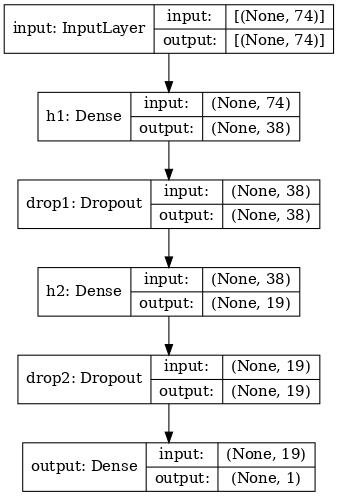

In [21]:
###############################################################################
#                         Visualization                                       #
###############################################################################

tf.keras.utils.plot_model(model=simple_dl, show_shapes=True, dpi=76, )

In [22]:
###############################################################################
#                         Visualization                                       #
###############################################################################
'''
Extract info for each layer in a keras model.
'''
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers



'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()
    ##########################################
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['auc']
    val_acc = history.history['val_auc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training auc')
    plt.plot(x, val_acc, 'r', label='Validation auc')
    plt.title('Training and validation MAE')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
#plot_history(history)

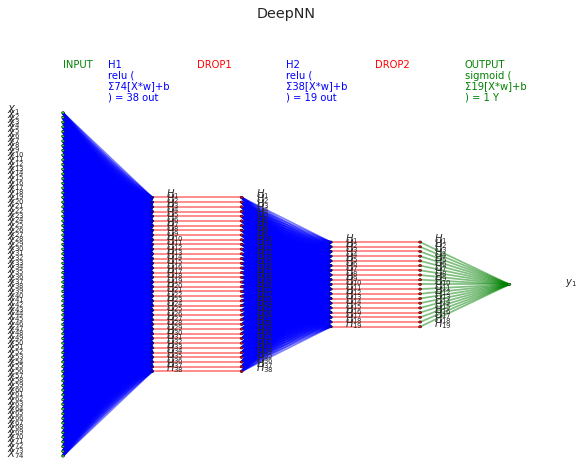

In [23]:
visualize_nn(simple_dl, description=True, figsize=(10,8))

<a id="0"></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home"><center>Functional api :Advanced Appproch </center></h3>

# Use a Learned Embedding for Categorical Data

A learned embedding, or simply an “embedding,” is a distributed representation for categorical data.

Each category is mapped to a distinct vector, and the properties of the vector are adapted or learned while training a neural network. The vector space provides a projection of the categories, allowing those categories that are close or related to cluster together naturally.

This provides both the benefits of an ordinal relationship by allowing any such relationships to be learned from data, and a one hot encoding in providing a vector representation for each category. Unlike one hot encoding, the input vectors are not sparse (do not have lots of zeros). The downside is that it requires learning as part of the model and the creation of many more input variables (columns).

The technique was originally developed to provide a distributed representation for words, e.g. allowing similar words to have similar vector representations. As such, the technique is often referred to as a word embedding, and in the case of text data, algorithms have been developed to learn a representation independent of a neural network. 

**Embedding Layer**

An embedding layer is pretty simple. It can be thought of as a lookup table of weights that has the same number of rows as your output embedding vector, and the same number of columns as there are categories in your categorical feature. For example, if you had 10 different elements in your categorical feature, you could visualise your embedding layer like so:

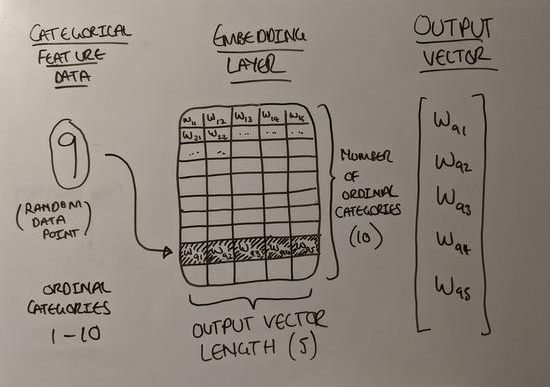

This embedding layer would convert each sample in your categorical feature into a vector of length 5. As it trains, your network will then update the weights in the table to best "describe" each element of your categorical feature.
Adding Embedding Layers to an MLP

Embedding layers like the above can be added for each of the categorical features in your dataset. The values from the vector outputs of these embeddings can then be fed into a basic MLP alongside the numeric data in your dataset, which is fed straight into the MLP unchanged:


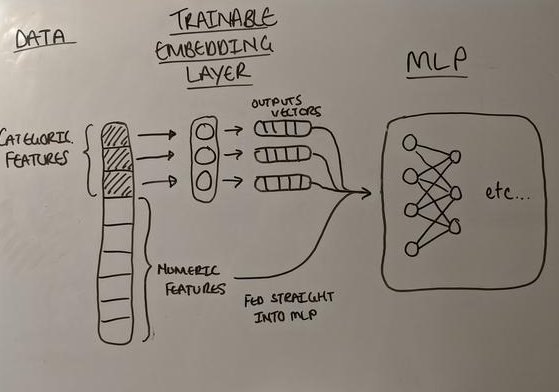


he whole network is then trained in forward / backward passes that begin and end at the embedding layers. By training the embedding layers, the network can learn the best embedding that represents the different features of the categorical variables.

**Embeddings can be used in Keras via the Embedding layer.**

One embedding layer is required for each categorical variable, and the embedding expects the categories to be ordinal encoded, although no relationship between the categories is assumed.

Each embedding also requires the number of dimensions to use for the distributed representation (vector space). It is common in natural language applications to use 50, 100, or 300 dimensions. For our small example, we will fix the number of dimensions at 10, but this is arbitrary; you should experimenter with other values.
##### Define the model : 


In [24]:
def generate_categorical_feature_tf(cat_columns,num_columns,data):
    with strategy.scope():
        models= []
        inputs = []
        for cat in cat_columns:

            vocab_size = data[cat].nunique()+1

            no_of_unique_cat  = len(np.unique(data[cat]))
            #Jeremy Howard provides the following rule of thumb; embedding size = min(50, number of categories/2).
            embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
            embedding_size = int(embedding_size)

            inpt = tf.keras.layers.Input(shape=(1,),
                                         name='input_'+'_'.join(cat.split(' ')))
            inputs.append(inpt)
            embed = tf.keras.layers.Embedding(vocab_size,embedding_size,\
                                              trainable=True,
                                              embeddings_initializer=tf.initializers.random_normal())(inpt)
            embed_rehsaped =tf.keras.layers.Reshape(target_shape=(embedding_size,))(embed)
            models.append(embed_rehsaped)
        num_input = tf.keras.layers.Input(shape=(len(num_columns)),\
                                          name='input_number_features')
        inputs.append(num_input)
        models.append(num_input)
        merge_models= tf.keras.layers.concatenate(models)
        pre_preds = tf.keras.layers.Dense(60)(merge_models)
        pre_preds = tf.keras.layers.BatchNormalization()(pre_preds)
        pre_preds = tf.keras.layers.Dense(40)(pre_preds)
        pre_preds = tf.keras.layers.BatchNormalization()(pre_preds)
        pre_preds = tf.keras.layers.Dense(20)(pre_preds)
        pre_preds = tf.keras.layers.BatchNormalization()(pre_preds)
        pred = tf.keras.layers.Dense(1, activation='sigmoid')(pre_preds)
        model_full = tf.keras.models.Model(inputs= inputs,\
                                           outputs =pred)
        # Compile model here
        optimizer_adam = tf.keras.optimizers.Adam(learning_rate=2e-7)
        model_full.compile(loss='binary_crossentropy',\
                               metrics=[AUC(name='auc')],
                               optimizer= optimizer_adam)
    
    return model_full

In [25]:
def generate_categorical_feature_tf_Bilstm(cat_features,num_features,data):
    with strategy.scope():
        models= []
        inputs = []
        models1=[]
        for cat in cat_features:

            vocab_size = data[cat].nunique()+1

            no_of_unique_cat  = len(np.unique(data[cat]))
            #Jeremy Howard provides the following rule of thumb; embedding size = min(50, number of categories/2).
            embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
            embedding_size = int(embedding_size)

            inpt = tf.keras.layers.Input(shape=(1,),name='input_'+'_'.join(cat.split(' ')))
            inputs.append(inpt)
            embed = tf.keras.layers.Embedding(vocab_size,embedding_size,\
                                              trainable=True

                #,embeddings_initializer=tf.initializers.random_normal
                            ,embeddings_initializer=tf.initializers.zeros()
                                         )(inpt)
            #embed_rehsaped =tf.keras.layers.Reshape(target_shape=(embedding_size,))(embed)
            models1.append(embed)
        merge_emb= tf.keras.layers.concatenate(models1)
        bilstm1 =  tf.keras.layers.Bidirectional( tf.keras.layers.LSTM(32,
                                                return_sequences=False))(merge_emb)
        x_emb = tf.keras.layers.Dense(4)(bilstm1)
        # bilstm2 = Bidirectional(LSTM(32, return_sequences=True))(bilstm1)

        num_input = tf.keras.layers.Input(shape=(len(num_columns)),\
                                          name='input_number_features')
        inputs.append(num_input)
        models.append(x_emb)
        models.append(num_input)
        merge_models= tf.keras.layers.concatenate(models)
        pre_preds = tf.keras.layers.Dense(160)(merge_models)
        pre_preds = tf.keras.layers.BatchNormalization()(pre_preds)
        pre_preds = tf.keras.layers.Dense(120)(pre_preds)
        pre_preds = tf.keras.layers.BatchNormalization()(pre_preds)
        pre_preds = tf.keras.layers.Dense(80)(pre_preds)
        pre_preds = tf.keras.layers.BatchNormalization()(pre_preds)
        pre_preds = tf.keras.layers.Dense(60)(pre_preds)
        pre_preds = tf.keras.layers.BatchNormalization()(pre_preds)
        pre_preds = tf.keras.layers.Dense(20)(pre_preds)
        pre_preds = tf.keras.layers.BatchNormalization()(pre_preds)
        pred = tf.keras.layers.Dense(1,activation='sigmoid')(pre_preds)
        model_full = tf.keras.models.Model(inputs= inputs,\
                                           outputs =pred)

          # Compile model here
        optimizer_adam = tf.keras.optimizers.Adam(learning_rate=2e-7)
        model_full.compile(loss='binary_crossentropy',\
                               metrics=[AUC(name='auc')],
                               optimizer= optimizer_adam)
    
    return model_full

In [26]:
def generate_categorical_feature_tf_CNN_LSTM(cat_features,num_features,data):
    with strategy.scope():
        models= []
        inputs = []
        models1=[]
        # first input model
        for cat in cat_features:

            vocab_size = data[cat].nunique()+1

            no_of_unique_cat  = len(np.unique(data[cat]))
            #Jeremy Howard provides the following rule of thumb; embedding size = min(50, number of categories/2).
            embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
            embedding_size = int(embedding_size)

            inpt = tf.keras.layers.Input(shape=(1,),name='input_'+'_'.join(cat.split(' ')))
            inputs.append(inpt)
            embed = tf.keras.layers.Embedding(vocab_size,embedding_size,\
                                              trainable=True

                #,embeddings_initializer=tf.initializers.random_normal
                            ,embeddings_initializer=tf.initializers.zeros()
                                         )(inpt)
            #embed_rehsaped =tf.keras.layers.Reshape(target_shape=(embedding_size,))(embed)
            models1.append(embed)
            #merge_emb= tf.keras.layers.concatenate(models1,axis=-1)
        merge_emb= tf.keras.layers.concatenate(models1,axis=-1)
        cat_merged = tf.keras.layers.Reshape((10, -1))(merge_emb)
        conv1 = tf.keras.layers.Conv1D(filters=4,
                   kernel_size=4,
                   strides=1,
                   activation='relu')(cat_merged)
        pool1 = tf.keras.layers.MaxPooling1D(pool_size=4)(conv1)
        lstm1 = tf.keras.layers.LSTM(32)(pool1)
        pre_cat = tf.keras.layers.Dense(4)(lstm1)
        # bilstm2 = Bidirectional(LSTM(32, return_sequences=True))(bilstm1)

        # Second input model
        num_input = tf.keras.layers.Input(shape=(len(num_columns)),\
                                          name='input_number_features')
        inputs.append(num_input)
        pre_preds = tf.keras.layers.Dense(60)(num_input)
        pre_preds = tf.keras.layers.BatchNormalization()(pre_preds)
        pre_preds = tf.keras.layers.Dense(40)(pre_preds)
        pre_preds = tf.keras.layers.BatchNormalization()(pre_preds)
        pre_preds = tf.keras.layers.Dense(20)(pre_preds)
        pre_preds = tf.keras.layers.BatchNormalization()(pre_preds)
        pre_num = tf.keras.layers.Dense(4)(pre_preds)

        # merge input models
        merge = tf.keras.layers.concatenate([pre_num, pre_cat])
        pred = tf.keras.layers.Dense(1,activation='sigmoid')(merge)
        model_full = tf.keras.models.Model(inputs= inputs,\
                                           outputs =pred)

        optimizer_adam = tf.keras.optimizers.Adam(learning_rate=2e-7)
        model_full.compile(loss=tf.keras.losses.binary_crossentropy,\
                               metrics=[AUC(name='auc')],
                               optimizer=optimizer_adam)
    return model_full

In [27]:
def ClassModelOneEncode(input_shape):
    with strategy.scope():
        X_input_bin = Input(input_shape)
        X_input = Input(input_shape)
        X = Embedding (input_dim=96, output_dim=18)(X_input_bin)
        #X = Dropout(0.4)(X)
        X = Flatten()(X)


        X = Dense(30, activation='swish')(X)
        X1 = Dense(30, kernel_initializer=tf.keras.initializers.GlorotNormal(), activation='swish')(X_input)
        X = Add()([X,X1])
        X = Dropout(0.5)(X)
        X = Dense(30, kernel_initializer=tf.keras.initializers.GlorotNormal(), activation='swish')(X)
        #     X = BatchNormalization()(X)
        X = Dropout(0.5)(X)

        X = Dense(1, kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='sigmoid', name='output2')(X)
        model = Model(inputs = [X_input_bin,X_input], outputs = X, name='ClassModel')

    return model
def generate_categorical_Grouped_tf_CNN_LSTM(cat_columns,num_columns,data):
    with strategy.scope():
        models= []
        inputs = []
        models1=[]
        # first input model
        for cat in cat_columns:

            vocab_size = data[cat].nunique()+1

            no_of_unique_cat  = len(np.unique(data[cat]))
            #Jeremy Howard provides the following rule of thumb; embedding size = min(50, number of categories/2).
            embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
            embedding_size = int(embedding_size)

            inpt = tf.keras.layers.Input(shape=(1,),name='input_'+'_'.join(cat.split(' ')))
            inputs.append(inpt)
            embed = tf.keras.layers.Embedding(vocab_size,embedding_size,\
                                              trainable=True

                #,embeddings_initializer=tf.initializers.random_normal
                            ,embeddings_initializer=tf.initializers.zeros()
                                         )(inpt)
            #embed_rehsaped =tf.keras.layers.Reshape(target_shape=(embedding_size,))(embed)
            models1.append(embed)
            #merge_emb= tf.keras.layers.concatenate(models1,axis=-1)
        merge_emb= tf.keras.layers.concatenate(models1,axis=-1)
        cat_merged = tf.keras.layers.Reshape((69, -1))(merge_emb)
        conv1 = tf.keras.layers.Conv1D(filters=4,
                   kernel_size=4,
                   strides=2,
                   activation='relu')(cat_merged)
        pool1 = tf.keras.layers.MaxPooling1D(pool_size=4)(conv1)
        lstm1 = tf.keras.layers.LSTM(32)(pool1)
        pre_cat = tf.keras.layers.Dense(4)(lstm1)
        # bilstm2 = Bidirectional(LSTM(32, return_sequences=True))(bilstm1)

        # Second input model
        num_input = tf.keras.layers.Input(shape=(len(num_columns)),\
                                          name='input_number_features')
        inputs.append(num_input)
        pre_preds = tf.keras.layers.Dense(60)(num_input)
        pre_preds = tf.keras.layers.BatchNormalization()(pre_preds)
        pre_preds = tf.keras.layers.Dense(40)(pre_preds)
        pre_preds = tf.keras.layers.BatchNormalization()(pre_preds)
        pre_preds = tf.keras.layers.Dense(20)(pre_preds)
        pre_preds = tf.keras.layers.BatchNormalization()(pre_preds)
        pre_num = tf.keras.layers.Dense(4)(pre_preds)

        # merge input models
        merge = tf.keras.layers.concatenate([pre_num, pre_cat])
        pred = tf.keras.layers.Dense(1,activation='sigmoid')(merge)
        model_full = tf.keras.models.Model(inputs= inputs,\
                                           outputs =pred)

        optimizer_adam = tf.keras.optimizers.Adam(learning_rate=2e-7)
        model_full.compile(loss=tf.keras.losses.binary_crossentropy,\
                               metrics=[AUC(name='auc')],
                               optimizer=optimizer_adam)
    return model_full

In [28]:
preprocessor_woe_powertransformer2.fit(X,y)
x_pre2 = preprocessor_woe_powertransformer2.transform(X)
x_test_final_pre2 = preprocessor_woe_powertransformer2.transform(X_test_final)
gc.collect()

424384

In [29]:
cat_columns=['cat_RevolvingUtilizationOfUnsecuredLines', 'cat_DebtRatio',
       'cat_MonthlyIncome', 'cat_NumberOfDependents',
       'cat_NumberOfTime60-89DaysPastDueNotWorse',
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age']

In [30]:
num_columns =['num_'+str(i) for i in range(int(x_pre2.shape[1]-10)) ]
print(num_columns+cat_columns)

['num_0', 'num_1', 'num_2', 'num_3', 'num_4', 'num_5', 'num_6', 'num_7', 'num_8', 'num_9', 'num_10', 'num_11', 'num_12', 'num_13', 'num_14', 'num_15', 'num_16', 'num_17', 'num_18', 'num_19', 'num_20', 'num_21', 'num_22', 'num_23', 'num_24', 'num_25', 'num_26', 'num_27', 'num_28', 'num_29', 'num_30', 'num_31', 'num_32', 'num_33', 'num_34', 'num_35', 'num_36', 'num_37', 'num_38', 'num_39', 'num_40', 'num_41', 'num_42', 'num_43', 'num_44', 'num_45', 'num_46', 'num_47', 'num_48', 'num_49', 'num_50', 'num_51', 'num_52', 'num_53', 'num_54', 'num_55', 'num_56', 'num_57', 'num_58', 'num_59', 'num_60', 'num_61', 'num_62', 'num_63', 'num_64', 'num_65', 'num_66', 'cat_RevolvingUtilizationOfUnsecuredLines', 'cat_DebtRatio', 'cat_MonthlyIncome', 'cat_NumberOfDependents', 'cat_NumberOfTime60-89DaysPastDueNotWorse', 'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate', 'cat_NumberOfOpenCreditLinesAndLoans', 'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age']


In [31]:
x_pre_embd_df = pd.DataFrame(x_pre2,columns=num_columns+cat_columns)
x_test_pre_embd_df = pd.DataFrame(x_test_final_pre2,columns=num_columns+cat_columns)
#x_pre_embd_df[cat_columns]=x_pre_embd_df[cat_columns].astype('category')
#x_test_pre_embd[cat_columns]=x_test_pre_embd[cat_columns].astype('category')
# select non-numeric columns
#cat_columns = x_pre_embd_df.select_dtypes(include=['object','category']).columns
# select the float columns
#num_columns = x_test_pre_embd.select_dtypes(exclude=['object','category']).columns
del x_pre2
del x_test_final_pre2
print(x_pre_embd_df.columns)
gc.collect()

Index(['num_0', 'num_1', 'num_2', 'num_3', 'num_4', 'num_5', 'num_6', 'num_7',
       'num_8', 'num_9', 'num_10', 'num_11', 'num_12', 'num_13', 'num_14',
       'num_15', 'num_16', 'num_17', 'num_18', 'num_19', 'num_20', 'num_21',
       'num_22', 'num_23', 'num_24', 'num_25', 'num_26', 'num_27', 'num_28',
       'num_29', 'num_30', 'num_31', 'num_32', 'num_33', 'num_34', 'num_35',
       'num_36', 'num_37', 'num_38', 'num_39', 'num_40', 'num_41', 'num_42',
       'num_43', 'num_44', 'num_45', 'num_46', 'num_47', 'num_48', 'num_49',
       'num_50', 'num_51', 'num_52', 'num_53', 'num_54', 'num_55', 'num_56',
       'num_57', 'num_58', 'num_59', 'num_60', 'num_61', 'num_62', 'num_63',
       'num_64', 'num_65', 'num_66',
       'cat_RevolvingUtilizationOfUnsecuredLines', 'cat_DebtRatio',
       'cat_MonthlyIncome', 'cat_NumberOfDependents',
       'cat_NumberOfTime60-89DaysPastDueNotWorse',
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpe

63

In [32]:
#model_emb = generate_categorical_feature_tf(cat_columns,num_columns,x_pre_embd_df)
#model_emb= generate_categorical_feature_tf_Bilstm(cat_columns,num_columns,x_pre_embd_df)
model_emb= generate_categorical_Grouped_tf_CNN_LSTM(cat_columns,num_columns,x_pre_embd_df)
 


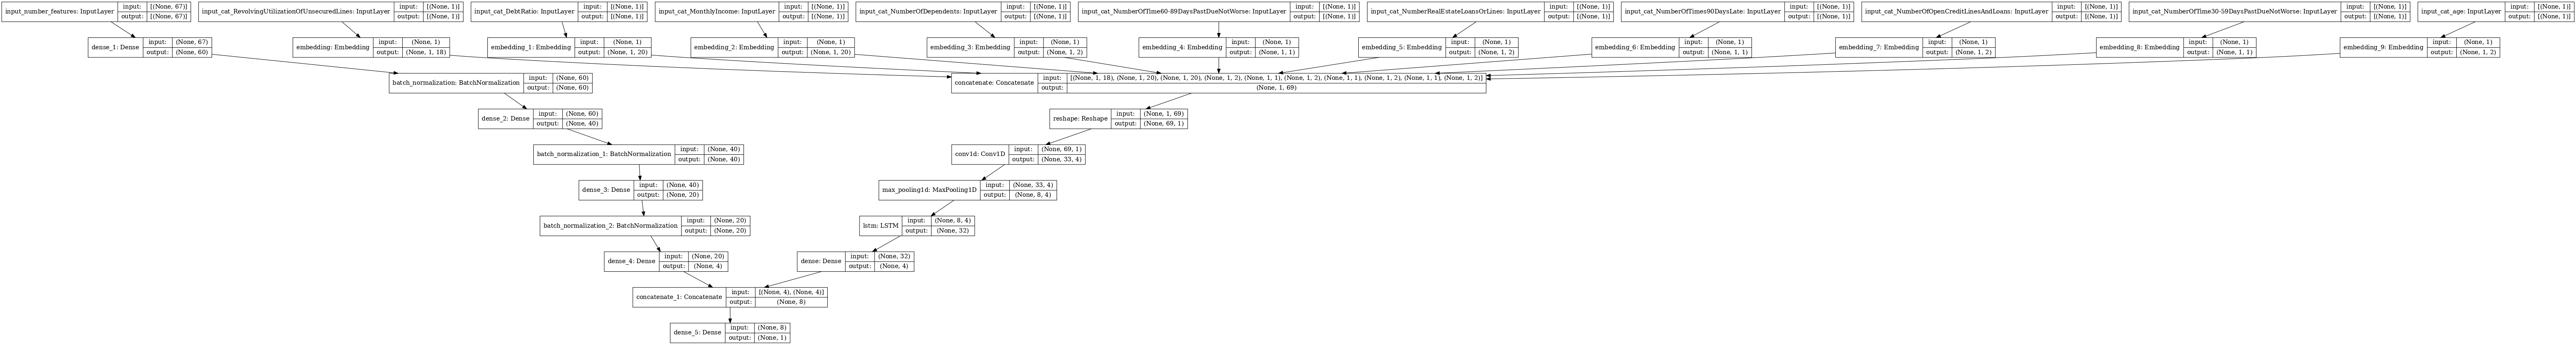

In [33]:
tf.keras.utils.plot_model(model = model_emb, show_shapes=True, dpi=76, )

**Now the last thing is to feed the data to our model.**

Since we have used a multi input neural network, it is best practice to feed your train data as a dictionary, where your keys are the name of the Input layer and the values are what each layer is expected to have. So let us do that so you can understand what I mean :

In [34]:
input_dict= {
    'input_cat_RevolvingUtilizationOfUnsecuredLines':x_pre_embd_df[cat_columns[0]],
    "input_cat_DebtRatio":x_pre_embd_df[cat_columns[1]],
    "input_cat_MonthlyIncome":x_pre_embd_df[cat_columns[2]],
    "input_cat_NumberOfDependents":x_pre_embd_df[cat_columns[3]],
    "input_cat_NumberOfTime60-89DaysPastDueNotWorse":x_pre_embd_df[cat_columns[4]],
    "input_cat_NumberRealEstateLoansOrLines":x_pre_embd_df[cat_columns[5]],
    "input_cat_NumberOfTimes90DaysLate":x_pre_embd_df[cat_columns[6]],
    "input_cat_NumberOfOpenCreditLinesAndLoans":x_pre_embd_df[cat_columns[7]],
    "input_cat_NumberOfTime30-59DaysPastDueNotWorse":x_pre_embd_df[cat_columns[8]],
    "input_cat_age":x_pre_embd_df[cat_columns[9]],
    "input_number_features": x_pre_embd_df[num_columns]
}
del x_pre_embd_df
test_dict= {
    'input_cat_RevolvingUtilizationOfUnsecuredLines':x_test_pre_embd_df[cat_columns[0]],
    "input_cat_DebtRatio":x_test_pre_embd_df[cat_columns[1]],
    "input_cat_MonthlyIncome":x_test_pre_embd_df[cat_columns[2]],
    "input_cat_NumberOfDependents":x_test_pre_embd_df[cat_columns[3]],
    "input_cat_NumberOfTime60-89DaysPastDueNotWorse":x_test_pre_embd_df[cat_columns[4]],
    "input_cat_NumberRealEstateLoansOrLines":x_test_pre_embd_df[cat_columns[5]],
    "input_cat_NumberOfTimes90DaysLate":x_test_pre_embd_df[cat_columns[6]],
    "input_cat_NumberOfOpenCreditLinesAndLoans":x_test_pre_embd_df[cat_columns[7]],
    "input_cat_NumberOfTime30-59DaysPastDueNotWorse":x_test_pre_embd_df[cat_columns[8]],
    "input_cat_age":x_test_pre_embd_df[cat_columns[9]],
    "input_number_features": x_test_pre_embd_df[num_columns]
}

del x_test_pre_embd_df


    EPOCHS =1000
    # configure early stopping
    es = EarlyStopping(monitor='val_loss',min_delta=0.000000000000001,
                       restore_best_weights=True,patience=2)
    #filepath = 'my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
    # define the checkpoint
    filepath = "model.hdf5"

    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, 
                                 monitor='val_loss',
                                 verbose=1, 
                                #save_weights_only=True,
                                 save_best_only=True,
                                 mode='min')
    #batch_size=1000
    # fit model using our gpu
    # fit model using our gpu
    with strategy.scope():
    #with tf.device('/gpu:0'):
            history = model_emb.fit(input_dict,y,batch_size=256,epochs=EPOCHS, 
                             validation_split = 0.1,
                             verbose=1 ,
                             callbacks=[lr_decay ,es,checkpoint],shuffle=True)

In [35]:
#kernel_initializer=tf.keras.initializers.VarianceScaling()

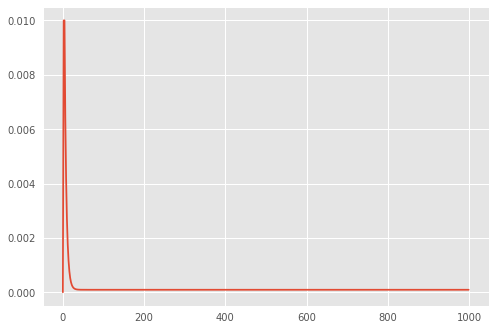

In [36]:
def get_lr_callback(epoch,lr):
    lr_start   = 0.00001
    lr_max     = 0.01#0.00000125 * 1 * batch_size
    lr_min     = 0.0001
    lr_ramp_ep = 2
    lr_sus_ep  = 2
    lr_decay   = 0.8
    
    def lrfn(epoch):
        if epoch < lr_ramp_ep: lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start
        elif epoch < lr_ramp_ep + lr_sus_ep: lr = lr_max
        else:
            lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min
        return lr
    
    return lrfn(epoch)

lr_callback = tf.keras.callbacks.LearningRateScheduler(get_lr_callback, verbose=True)
x = [x for x in range(1000)]
plt.plot(x,[get_lr_callback(x,.1) for x in x])
plt.show()

In [37]:
###############################################################################
#                         Configuration                                       #
###############################################################################
EPOCHS =1000
# configure early stopping
es = EarlyStopping(monitor='val_loss',
                   mode='auto',
                   patience=20,
                   #,min_delta=0.000001,
                   restore_best_weights=True)
#filepath = 'my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
# define the checkpoint
filepath = "model.hdf5"

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, 
                             monitor='val_auc',
                             verbose=1, 
                            #save_weights_only=True,
                             save_best_only=True,
                             mode='max')
###############################################################################
#                        Learning Rate Scheduler                              #
###############################################################################

# set learning rate scheduler
# we can chage learning rate during learning
def lr_schedul(epoch):
    x = 0.0001
    if epoch >= 20:
        x= 0.00001
    if epoch >= 40:
        x = 0.00001
    if epoch >= 60:
        x = 0.000001
    if epoch >= 80:
        x = 0.0000001
    if epoch >= 100:
        x = 0.00000001
    if epoch >= 120:
        x = 0.000000001        
    return x

lr_decay = LearningRateScheduler(
    lr_schedul,
    verbose=1,
)
###############################################################################
#                         Train  model                               #
###############################################################################

#batch_size=1000
# fit model using our gpu
# fit model using our gpu
with strategy.scope():
#with tf.device('/gpu:0'):
    history = simple_dl.fit(x_pre,y,batch_size=64,epochs=EPOCHS, 
                        validation_split = 0.1,
                        verbose=1 ,
                        callbacks=[lr_callback ,es,checkpoint])
                       # callbacks=[lr_decay ,es,checkpoint])
                        #callbacks=[es,checkpoint])
    
#with strategy.scope():
#with tf.device('/gpu:0'):
 #       history = model_emb.fit(input_dict,y,batch_size=64,epochs=EPOCHS, 
  #                       validation_split = 0.1,
   #                      verbose=1 ,
    #                     callbacks=[lr_decay ,es,checkpoint],shuffle=True) 
gc.collect()    

2022-01-10 16:41:00.973652: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-10 16:41:00.983778: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200000000 Hz


Epoch 1/1000

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.


2022-01-10 16:41:01.860113: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11


  25/2110 [..............................] - ETA: 8s - loss: 1.2813 - auc: 0.6417

2022-01-10 16:41:02.677985: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


2110/2110 [==============================] - 13s 5ms/step - loss: 1.0486 - auc: 0.6506 - val_loss: 0.5705 - val_auc: 0.5561

Epoch 00001: val_auc improved from -inf to 0.55606, saving model to model.hdf5
Epoch 2/1000

Epoch 00002: LearningRateScheduler reducing learning rate to 0.005005.
2110/2110 [==============================] - 10s 5ms/step - loss: 0.2442 - auc: 0.7876 - val_loss: 0.1861 - val_auc: 0.8678

Epoch 00002: val_auc improved from 0.55606 to 0.86782, saving model to model.hdf5
Epoch 3/1000

Epoch 00003: LearningRateScheduler reducing learning rate to 0.01.
2110/2110 [==============================] - 11s 5ms/step - loss: 0.1928 - auc: 0.8322 - val_loss: 0.1964 - val_auc: 0.8612

Epoch 00003: val_auc did not improve from 0.86782
Epoch 4/1000

Epoch 00004: LearningRateScheduler reducing learning rate to 0.01.
2110/2110 [==============================] - 10s 5ms/step - loss: 0.1947 - auc: 0.8354 - val_loss: 0.1897 - val_auc: 0.8670

Epoch 00004: val_auc did not improve from 

15843

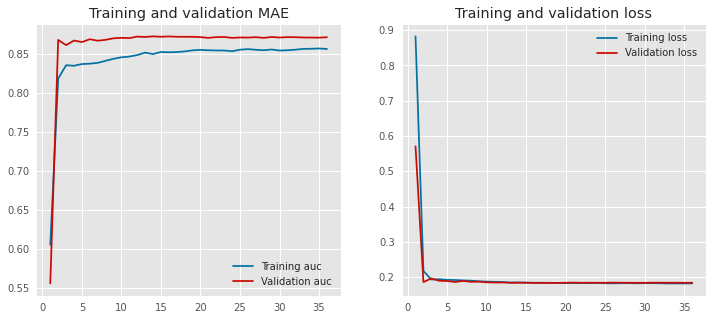

In [38]:
plot_history(history)

In [39]:
# evaluate the keras model
model = tf.keras.models.load_model(filepath)
# evaluate the keras model
loss, auc = model.evaluate( x_pre ,y, verbose=2)
#loss, auc = model.evaluate( input_dict ,y, verbose=2)

4688/4688 - 13s - loss: 0.1796 - auc: 0.8660


In [40]:
print("auc:{}".format(auc))
print("loss:{}".format(loss))

auc:0.8659941554069519
loss:0.179640993475914


# Explain DL 

In [41]:
'''
Use shap to build an a explainer.
:parameter
    :param model: model instance (after fitting)
    :param X_names: list
    :param X_instance: array of size n x 1 (n,)
    :param X_train: array - if None the model is simple machine learning, if not None then it's a deep learning model
    :param task: string - "classification", "regression"
    :param top: num - top features to display
:return
    dtf with explanations
'''
def explainer_shap(model, X_names, X_instance, X_train=None, task="classification", top=10):
    ## create explainer
    ### machine learning
    if X_train is None:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_instance)
    ### deep learning
    else:
        explainer = shap.DeepExplainer(model, data=X_train[:100])
        shap_values = explainer.shap_values(X_instance.reshape(1,-1))[0].reshape(-1)

    ## plot
    ### classification
    if task == "classification":
        shap.decision_plot(explainer.expected_value, shap_values, link='logit', feature_order='importance',
                           features=X_instance, feature_names=X_names, feature_display_range=slice(-1,-top-1,-1))
    ### regression
    else:
        shap.waterfall_plot(explainer.expected_value[0], shap_values, 
                            features=X_instance, feature_names=X_names, max_display=top)

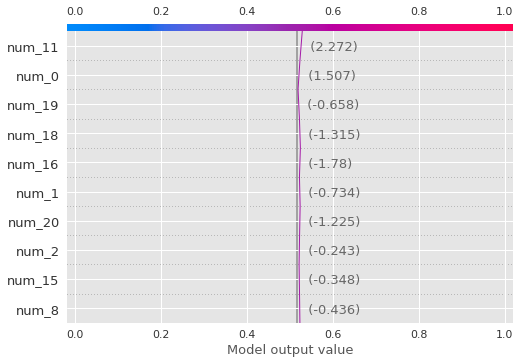

In [42]:
i = 1
list_feature_names =['num_'+str(i) for i in range(int(x_pre.shape[1])) ]

explainer_shap(model, 
               X_names=list_feature_names, 
               X_instance=x_pre[i], 
               X_train=x_pre, 
               task="classification", #task="regression"
               top=10)

# Predict Unseen data : 

In [43]:
#predictions_final = model.predict(test_dict)
predictions = model.predict(x_test_final_pre)

In [44]:
# Save the predictions to a CSV file
sub = pd.read_csv('../input/GiveMeSomeCredit/sampleEntry.csv')
sub['Probability']=predictions
sub.to_csv('StackingAveragedModelsBin22.csv', index=False)
sub

,Id,Probability
0,1,0.070524
1,2,0.055756
2,3,0.017340
3,4,0.091515
4,5,0.131891
...,...,...
101498,101499,0.018208
101499,101500,0.242947
101500,101501,0.001520
101501,101502,0.054175


# Summuray 

We tried  encoding tecthniques in order to have better results 
As is always the case with neural networks, there are a huge number of possible architectures and parameters to play around with. Possible interesting avenues include:

    adding / removing / widening / shortening layers in the network
    adjusting the regularization layers / parameters (dropout / l2)
    adding new regularization parameters
    changing activation functions
    changing the gradient descent optimizer
    adjusting the learning rate and no of epochs
    etc, etc.....

With some tinkering, you'll find that the networks performance can quickly approach that of the aforementioned popular models. Neural networks like this also offer a huge amount of flexibility which can offer some really promising avenues for improving your scores.

Note: you can dramatically improve the training time of the model by increasing the batch size and utilizing a GPU session!

reference : 
to try : 
deep + kfold : 

https://www.kaggle.com/lucamassaron/deep-learning-for-tabular-data



https://mmuratarat.github.io/2019-06-12/embeddings-with-numeric-variables-Keras

https://www.slideshare.net/MeetupDataScienceRoma/deep-learning-for-tabular-data-luca-massaron

https://medium.com/analytics-vidhya/tensorflow-2-tutorial-on-categorical-features-embedding-93dd81027ea9

https://www.kaggle.com/mtinti/keras-starter-with-bagging-1111-84364

https://www.kaggle.com/faressayah/tensorflow-2-tutorial-get-started-in-deep-learning

https://www.kaggle.com/colinmorris/embedding-layers

https://www.kaggle.com/dustyturner/dense-nn-with-categorical-embeddings

wrap keras regressor : 

https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/





cat embedding : 

https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/

# Reference  : 
https://www.kaggle.com/lucamassaron/deep-learning-for-tabular-data

https://www.kaggle.com/lukaszborecki/tps-09-nn

https://www.kaggle.com/siavrez/kerasembeddings


Things to try : 

https://www.kaggle.com/datafan07/top-1-approach-eda-new-models-and-stacking


Deep  : 
https://www.kaggle.com/shivansh002/tame-your-neural-network-once-for-all

https://www.kaggle.com/lukaszborecki/tps-09-nn/

https://www.kaggle.com/bannourchaker/10-deeplearning-embedding-rnn-tf-keras

https://www.kaggle.com/bannourchaker/single-nn/edit

https://www.kaggle.com/bannourchaker/deep-learning-starter-gpu

learing rate adaptative vs scheulde : 

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

Best mine : 


https://www.kaggle.com/deepchaka/deep-learning-ventilator-time-series-regress/edit/run/78653879

https://www.kaggle.com/deepchaka/deeplearning2/edit/run/78470709


https://www.kaggle.com/deepchaka/deeplearning2/edit/run/78470709https://www.kaggle.com/deepchaka/deeplearning2/edit/run/78470709

https://www.kaggle.com/deepchaka/deep-lstm-test-kaggle-quantile-cat-freduced-tpu/edit/run/78738587

https://www.kaggle.com/deepchaka/deep-lstm-test-kaggle-quantile-cat-freduced-tpu/edit/run/78738587



